In [33]:
import torch

print("PyTorch Version : {}".format(torch.__version__))

import torchvision

print("TorchVision Version : {}".format(torchvision.__version__))

PyTorch Version : 2.5.1+cu121
TorchVision Version : 0.20.1+cu121


In [34]:
from PIL import Image



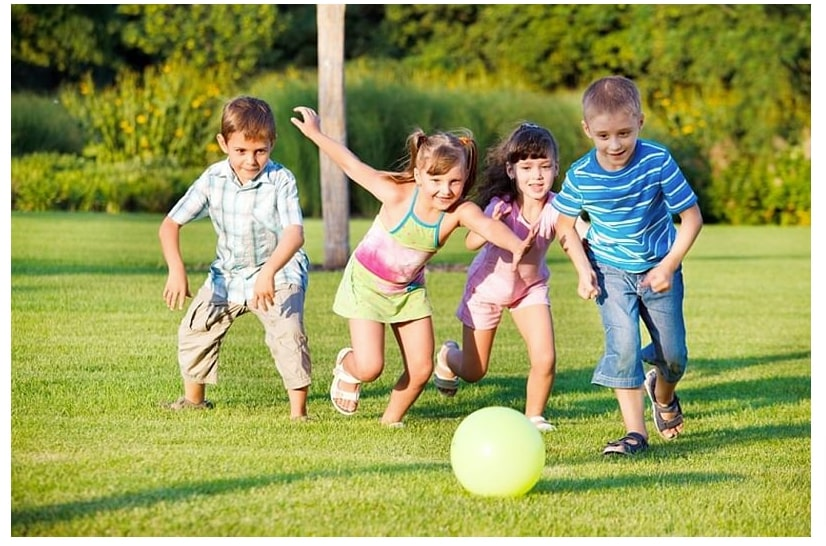

In [35]:
kids = Image.open("kids.jpg")

kids

Load Model

In [36]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights

weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT

object_detection_model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)

object_detection_model.eval(); ## Setting Model for Evaluation/Prediction

In [37]:
categories = weights.meta["categories"]

print(categories)

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


Make Prediction

In [38]:
img_preprocess = weights.transforms()

kids_processed = img_preprocess(kids)

kids_processed.shape

torch.Size([3, 546, 826])

In [39]:
prediction = object_detection_model(kids_processed.unsqueeze(0))

prediction = prediction[0]

prediction

{'boxes': tensor([[554.3572,  77.5418, 703.0353, 456.3304],
         [155.7428, 100.4824, 313.3611, 422.1578],
         [290.0132, 102.2761, 546.3813, 426.4415],
         [433.8922, 122.9089, 589.2715, 432.3810],
         [449.1898, 406.1940, 546.5212, 499.2857]], grad_fn=<StackBackward0>),
 'labels': tensor([ 1,  1,  1,  1, 37]),
 'scores': tensor([0.9999, 0.9998, 0.9992, 0.9983, 0.9972], grad_fn=<IndexBackward0>)}

In [9]:
prediction["labels"] = [categories[label] for label in prediction["labels"]]

prediction

{'boxes': tensor([[554.3572,  77.5418, 703.0353, 456.3304],
         [155.7428, 100.4824, 313.3611, 422.1578],
         [290.0132, 102.2761, 546.3813, 426.4415],
         [433.8922, 122.9089, 589.2715, 432.3810],
         [449.1898, 406.1940, 546.5212, 499.2857]], grad_fn=<StackBackward0>),
 'labels': ['person', 'person', 'person', 'person', 'sports ball'],
 'scores': tensor([0.9999, 0.9998, 0.9992, 0.9983, 0.9972], grad_fn=<IndexBackward0>)}

Visualize Result


In [14]:
from torchvision.utils import draw_bounding_boxes
from torchvision.io.image import read_image

labels_with_scores = [f"{label} ({int(score * 100)}%)"
        for label, score in zip(prediction["labels"], prediction["scores"])]

kids = read_image("kids.jpg")

kids_with_bboxes = draw_bounding_boxes(kids, boxes=prediction["boxes"],
        labels=labels_with_scores,  # Add labels with confidence percentages
        colors=["yellow" for _ in prediction["labels"]],  # Bright yellow for all boxes
        width=2)

kids_with_bboxes.shape

torch.Size([3, 546, 826])

In [15]:
kids_with_bboxes_np = kids_with_bboxes.detach().numpy()

kids_with_bboxes_np  = kids_with_bboxes_np.transpose(1,2,0)

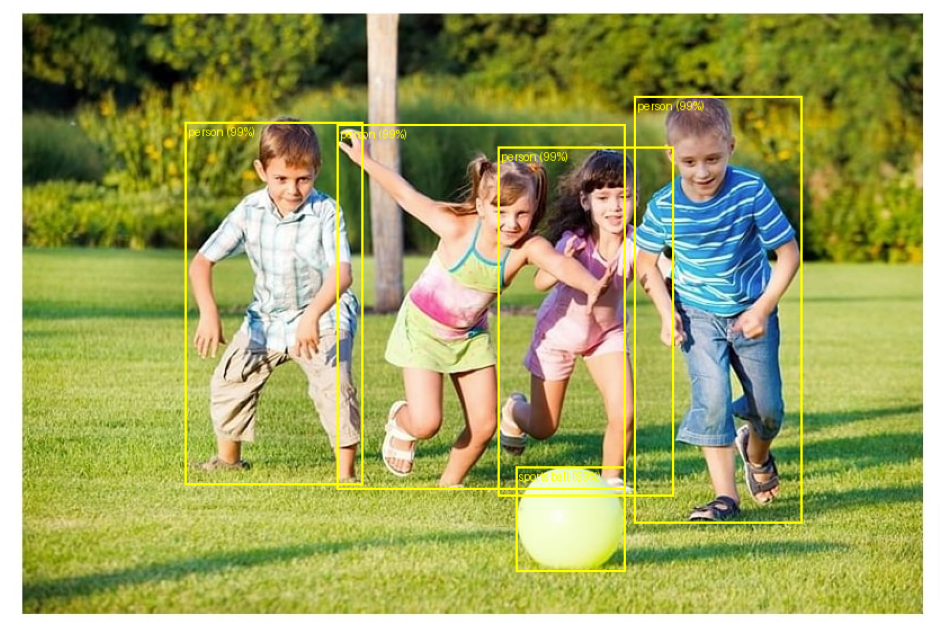

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

plt.imshow(kids_with_bboxes_np);
plt.xticks([],[]);
plt.yticks([],[]);
ax.spines[["top", "left", "right", "bottom"]].set_visible(False)